In [1]:
import os
import math
import sklearn

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import utils

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=1000)

rd_seed = 333

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix = pd.read_csv(path_file, sep=",", index_col='studium_id') 

In [3]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             4081 non-null   int64  
 1   je_cech                 4081 non-null   int64  
 2   datum_zahajeni          4081 non-null   int64  
 3   rok_maturity            4081 non-null   int64  
 4   maturita_nastup_rozdil  4081 non-null   int64  
 5   gymnazium               4081 non-null   int64  
 6   praha                   4081 non-null   int64  
 7   scio                    4081 non-null   int64  
 8   olym                    4081 non-null   int64  
 9   zkouska                 4081 non-null   int64  
 10  prominuti               4081 non-null   int64  
 11  dostudoval_uspesne      4081 non-null   int64  
 12  BI-PA1                  3997 non-null   float64
 13  BI-PAI                  3894 non-null   float64
 14  BI-CAO                  4003 

In [4]:
matrix

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19374606,0,1,2021,2009,12,1,0,0,1,0,0,0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12375406,0,1,2015,2009,6,0,1,0,0,0,0,1,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,NaN,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,0,1,2015,2009,6,1,0,0,0,0,0,0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12032306,0,1,2015,2007,8,0,1,0,0,0,0,0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15613006,0,1,2018,2009,9,1,1,0,0,0,0,0,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,NaN,2.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814506,0,1,2021,2021,0,1,1,1,1,0,0,0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11677106,0,1,2015,2003,12,0,1,0,0,0,0,0,4.0,2.5,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13513806,0,1,2016,2006,10,0,1,0,0,0,0,0,4.0,4.0,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selekce atributů

In [5]:
# odstraneni neznamkovych atributu
matrix = matrix.drop(columns=['dostudoval_uspesne', 'pohlavi_kod', 'je_cech', 'datum_zahajeni',
                             'rok_maturity', 'maturita_nastup_rozdil', 'gymnazium',
                             'praha', 'scio', 'olym', 'zkouska', 'prominuti'])

## Doplnění NaN hodnot

In [6]:
imp = KNNImputer(n_neighbors=5)
matrix = pd.DataFrame(imp.fit_transform(matrix), index=matrix.index, columns=matrix.columns)

In [7]:
matrix

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,
19374606,4.0,3.6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.4,4.0,4.0,3.7,3.7,3.4,3.7,2.6,1.9,2.6,3.3
12375406,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,2.8,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.6,3.6,3.7,4.0,4.0,3.7,3.1,3.7,3.7,2.9,1.8,3.2,2.9
12032306,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.6,3.6,3.7,4.0,4.0,3.7,3.1,3.7,3.7,2.9,1.8,3.2,2.9
15613006,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,1.7,2.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814506,4.0,3.6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.4,4.0,4.0,3.7,3.7,3.4,3.7,2.6,1.9,2.6,3.3
11677106,4.0,2.5,1.0,4.0,4.0,4.0,4.0,3.6,3.6,3.7,4.0,4.0,4.0,3.5,3.5,4.0,3.8,2.6,2.6,2.6
13513806,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,3.6,3.7,4.0,4.0,4.0,3.5,3.5,4.0,3.8,2.5,3.1,3.5


## Zaokrouhlení doplněných hodnot

In [8]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [9]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [10]:
matrix = matrix.applymap(custom_round)

In [11]:
matrix

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,
19374606,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.5,2.0,2.5,3.0
12375406,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,3.0,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0
12032306,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0
15613006,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,1.5,2.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814506,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.5,2.0,2.5,3.0
11677106,4.0,2.5,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.5,2.5,2.5
13513806,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.5,3.0,3.0


## Rozdělení datasetu

In [12]:
train, test = train_test_split(matrix, test_size=0.2, shuffle=True)

## Nastavení param_grid 

In [13]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'] 
}
param_comb = ParameterGrid(param_grid)

In [14]:
lab = preprocessing.LabelEncoder()

In [15]:
courses = np.array(matrix.columns.unique())

In [16]:
courses

array(['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA',
       'BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG',
       'BI-ZDM', 'BI-OSY', 'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR',
       'BI-SI1.2', 'BI-EMP'], dtype=object)

In [17]:
def get_prediction(course):
    # rozdeleni datasetu
    Xtrain_course = train.drop(columns=course)
    ytrain_course = train[course]
    Xtest_course = test.drop(columns=course)
    ytest_course = test[course]
    
    # zmena priznaku na kategoricke ordinalni
    grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4], ordered=True)
    course_arr = np.array(course)
    feature_courses = np.setdiff1d(course_arr, courses)
    for feature in feature_courses:
        Xtrain_course[feature] = Xtrain_course[feature].astype(grades_category)
        Xtest_course[feature] = Xtest_course[feature].astype(grades_category)
        
    #convert y values to categorical values
    ytrain_course = lab.fit_transform(ytrain_course)
    ytest_course = lab.fit_transform(ytest_course)
    
    # create model
    model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    model.fit(Xtrain_course, ytrain_course)
    
    # get prediction
    y_train_predicted = model.predict(Xtrain_course)
    y_test_predicted = model.predict(Xtest_course)
    
    # get accuracy score
    acc_train = metrics.accuracy_score(np.array(ytrain_course), np.array(y_train_predicted))
    acc_test = metrics.accuracy_score(np.array(ytest_course), np.array(y_test_predicted))
    return model, acc_train, acc_test

## PA1

In [18]:
knn_pa1, pa1_train_acc, pa1_test_acc = get_prediction('BI-PA1')

In [19]:
print('Accuracy score (train):', pa1_train_acc)
print('Accuracy score (test):', pa1_test_acc)

Accuracy score (train): 0.9969362745098039
Accuracy score (test): 0.6903304773561811


## PAI

In [20]:
knn_pai, pai_train_acc, pai_test_acc = get_prediction('BI-PAI')

In [21]:
print('Accuracy score (train):', pai_train_acc)
print('Accuracy score (test):', pai_test_acc)

Accuracy score (train): 0.9598651960784313
Accuracy score (test): 0.5850673194614443


## ZMA

In [22]:
knn_zma, zma_train_acc, zma_test_acc = get_prediction('BI-ZMA')

In [23]:
print('Accuracy score (train):', zma_train_acc)
print('Accuracy score (test):', zma_test_acc)

Accuracy score (train): 0.9984681372549019
Accuracy score (test): 0.7258261933904528


## MLO

In [24]:
knn_mlo, mlo_train_acc, mlo_test_acc = get_prediction('BI-MLO')

In [25]:
print('Accuracy score (train):', mlo_train_acc)
print('Accuracy score (test):', mlo_test_acc)

Accuracy score (train): 0.9920343137254902
Accuracy score (test): 0.6585067319461444


## CAO

In [26]:
knn_cao, cao_train_acc, cao_test_acc = get_prediction('BI-CAO')

In [27]:
print('Accuracy score (train):', cao_train_acc)
print('Accuracy score (test):', cao_test_acc)

Accuracy score (train): 0.9852941176470589
Accuracy score (test): 0.7086903304773562


## PS1

In [28]:
knn_ps1, ps1_train_acc, ps1_test_acc = get_prediction('BI-PS1')

In [29]:
print('Accuracy score (train):', ps1_train_acc)
print('Accuracy score (test):', ps1_test_acc)

Accuracy score (train): 0.9898897058823529
Accuracy score (test): 0.6181150550795593


## PA2

In [30]:
knn_pa2, pa2_train_acc, pa2_test_acc = get_prediction('BI-PA2')

In [31]:
print('Accuracy score (train):', pa2_train_acc)
print('Accuracy score (test):', pa2_test_acc)

Accuracy score (train): 1.0
Accuracy score (test): 0.7882496940024479


## LIN

In [32]:
knn_lin, lin_train_acc, lin_test_acc = get_prediction('BI-LIN')

In [33]:
print('Accuracy score (train):', lin_train_acc)
print('Accuracy score (test):', lin_test_acc)

Accuracy score (train): 0.9993872549019608
Accuracy score (test): 0.7943696450428397


## DBS

In [34]:
knn_dbs, dbs_train_acc, dbs_test_acc = get_prediction('BI-DBS')

In [35]:
print('Accuracy score (train):', dbs_train_acc)
print('Accuracy score (test):', dbs_test_acc)

Accuracy score (train): 0.9996936274509803
Accuracy score (test): 0.6780905752753978


## SAP

In [36]:
knn_sap, sap_train_acc, sap_test_acc = get_prediction('BI-SAP')

In [37]:
print('Accuracy score (train):', sap_train_acc)
print('Accuracy score (test):', sap_test_acc)

Accuracy score (train): 0.9987745098039216
Accuracy score (test): 0.6964504283965728


## AAG

In [38]:
knn_aag, aag_train_acc, aag_test_acc = get_prediction('BI-AAG')

In [39]:
print('Accuracy score (train):', aag_train_acc)
print('Accuracy score (test):', aag_test_acc)

Accuracy score (train): 1.0
Accuracy score (test): 0.7882496940024479


## AG1

In [40]:
knn_ag1, ag1_train_acc, ag1_test_acc = get_prediction('BI-AG1')

In [41]:
print('Accuracy score (train):', ag1_train_acc)
print('Accuracy score (test):', ag1_test_acc)

Accuracy score (train): 1.0
Accuracy score (test): 0.8457772337821298


## ZDM

In [42]:
knn_zdm, zdm_train_acc, zdm_test_acc = get_prediction('BI-ZDM')

In [43]:
print('Accuracy score (train):', zdm_train_acc)
print('Accuracy score (test):', zdm_test_acc)

Accuracy score (train): 1.0
Accuracy score (test): 0.847001223990208


## OSY

In [44]:
knn_osy, osy_train_acc, osy_test_acc = get_prediction('BI-OSY')

In [45]:
print('Accuracy score (train):', osy_train_acc)
print('Accuracy score (test):', osy_test_acc)

Accuracy score (train): 0.9996936274509803
Accuracy score (test): 0.8212974296205631


## PSI

In [46]:
knn_psi, psi_train_acc, psi_test_acc = get_prediction('BI-PSI')

In [47]:
print('Accuracy score (train):', psi_train_acc)
print('Accuracy score (test):', psi_test_acc)

Accuracy score (train): 0.9993872549019608
Accuracy score (test): 0.7674418604651163


## BEZ

In [48]:
knn_bez, bez_train_acc, bez_test_acc = get_prediction('BI-BEZ')

In [49]:
print('Accuracy score (train):', bez_train_acc)
print('Accuracy score (test):', bez_test_acc)

Accuracy score (train): 1.0
Accuracy score (test): 0.7858017135862914


## PST

In [50]:
knn_pst, pst_train_acc, pst_test_acc = get_prediction('BI-PST')

In [51]:
print('Accuracy score (train):', pst_train_acc)
print('Accuracy score (test):', pst_test_acc)

Accuracy score (train): 0.9990808823529411
Accuracy score (test): 0.7858017135862914


## DPR

In [52]:
knn_dpr, dpr_train_acc, dpr_test_acc = get_prediction('BI-DPR')

In [53]:
print('Accuracy score (train):', dpr_train_acc)
print('Accuracy score (test):', dpr_test_acc)

Accuracy score (train): 0.9947916666666666
Accuracy score (test): 0.6401468788249693


## EMP

In [54]:
knn_emp, emp_train_acc, emp_test_acc = get_prediction('BI-EMP')

In [55]:
print('Accuracy score (train):', emp_train_acc)
print('Accuracy score (test):', emp_test_acc)

Accuracy score (train): 0.9993872549019608
Accuracy score (test): 0.6572827417380661


## SI1.2

In [56]:
knn_si1, si1_train_acc, si1_test_acc = get_prediction('BI-SI1.2')

In [57]:
print('Accuracy score (train):', si1_train_acc)
print('Accuracy score (test):', si1_test_acc)

Accuracy score (train): 0.9993872549019608
Accuracy score (test): 0.6915544675642595


# Výsledky

No handles with labels found to put in legend.


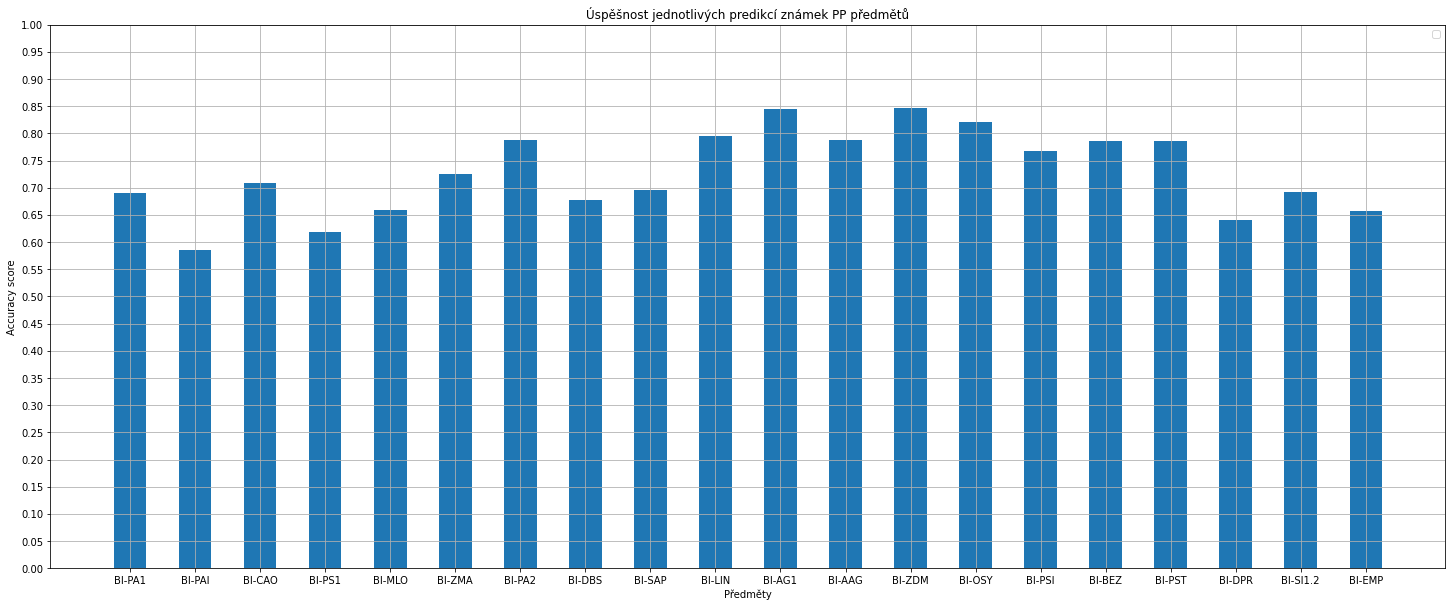

In [58]:
y = [
    pa1_test_acc,
    pai_test_acc,
    cao_test_acc,
    ps1_test_acc,
    mlo_test_acc,
    zma_test_acc,
    pa2_test_acc,
    dbs_test_acc,
    sap_test_acc,
    lin_test_acc,
    ag1_test_acc,
    aag_test_acc,
    zdm_test_acc,
    osy_test_acc,
    psi_test_acc,
    bez_test_acc,
    pst_test_acc,
    dpr_test_acc,
    si1_test_acc,
    emp_test_acc
]

x = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG', 'BI-ZDM', 'BI-OSY',
       'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR', 'BI-SI1.2', 'BI-EMP']
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , y, width)

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Předměty')
ax.set_title('Úspěšnost jednotlivých predikcí známek PP předmětů')
ax.set_xticks(x)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()